In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222)
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

# metadata 
#print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [2]:
#Changing 'yes' 'no' to 1 0 in y
y = y.replace({'y': {'yes': 1, 'no': 0}})

#Only includes numerical features
X_num = X.select_dtypes(include=np.number)

In [3]:
from sklearn.model_selection import train_test_split

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_num, y, test_size=0.2, random_state=16)

## Simple MAE of LogReg

In [4]:
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [5]:
score_dataset(X_train, X_valid, y_train, y_valid)

0.11544841313723322

## Creating ROC Curve

In [6]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_valid)

In [7]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
cnf_matrix

array([[7842,  100],
       [ 944,  157]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

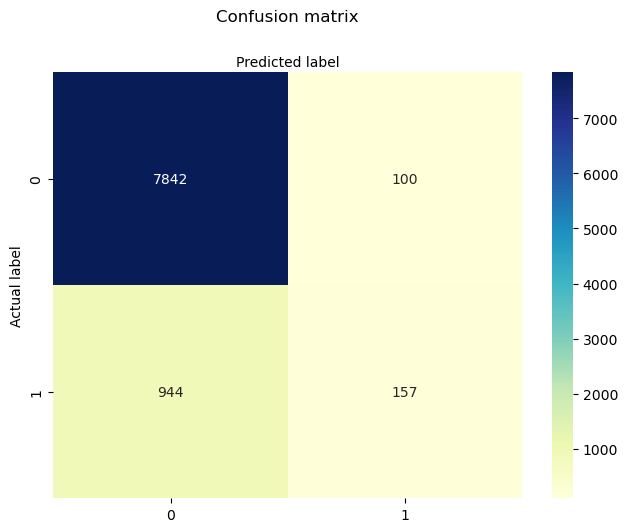

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [9]:
from sklearn.metrics import classification_report
target_names = ['did not subscribe', 'subscribed']
print(classification_report(y_valid, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

did not subscribe       0.89      0.99      0.94      7942
       subscribed       0.61      0.14      0.23      1101

         accuracy                           0.88      9043
        macro avg       0.75      0.57      0.58      9043
     weighted avg       0.86      0.88      0.85      9043



In [10]:
lr_probs = logreg.predict_proba(X_valid)
lr_probs = lr_probs[:, 1]

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
lr_auc = roc_auc_score(y_valid, lr_probs)

In [13]:
print("Logistic Regression Prediction: AUROC = %.3f" % (lr_auc))

Logistic Regression Prediction: AUROC = 0.764


In [14]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_valid, lr_probs)

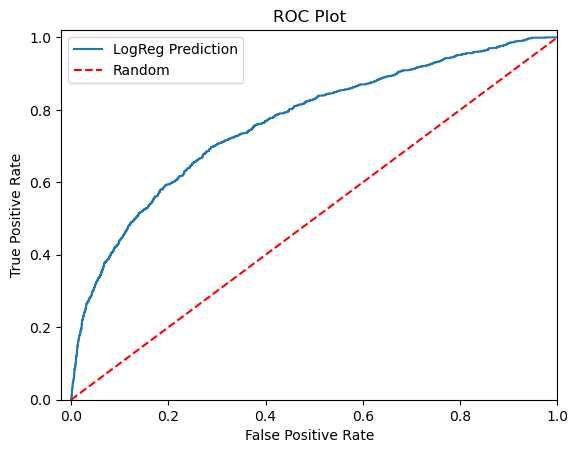

In [15]:
plt.plot(lr_fpr, lr_tpr, label = 'LogReg Prediction')

#Title
plt.title('ROC Plot')
#Axis Labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#Plot Limits
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
#Show Random
plt.plot([0, 1], [0, 1],'r--',label='Random')
#Show Legend
plt.legend()
#Show Plot
plt.show()

In [16]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder

s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print(object_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
